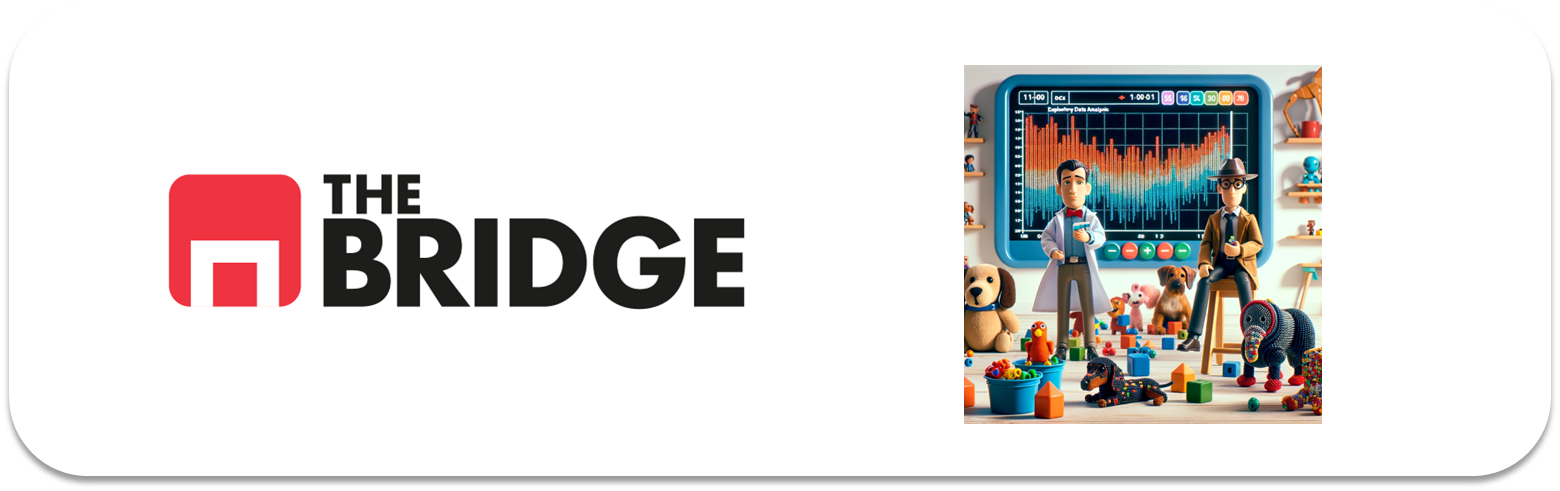

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck", "survived", "pclass","embarked"], inplace=True)

In [5]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [7]:
df_titanic.drop(columns=["parch" , "sibsp"], inplace=True)

In [8]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [13]:
print(df_titanic["embark_town"].value_counts(), "\n")

df_titanic["embark_town"].mode()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64 



0    Southampton
Name: embark_town, dtype: object

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [29]:
# num de valores nulos en age
print("El num de valores nulos en 'age' es de:", df_titanic["age"].isna().sum())

# media de valores nulos en age
print("La media de 'age' es de:", round(df_titanic["age"].mean(),2))

# filas nulas
df_titanic.loc[df_titanic["age"].isna()]

El num de valores nulos en 'age' es de: 177
La media de 'age' es de: 29.7


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
17,male,NaN,13.0000,Second,man,True,Southampton,yes,True,0
19,female,NaN,7.2250,Third,woman,False,Cherbourg,yes,True,0
26,male,NaN,7.2250,Third,man,True,Cherbourg,no,True,0
28,female,NaN,7.8792,Third,woman,False,Queenstown,yes,True,0
...,...,...,...,...,...,...,...,...,...,...
859,male,NaN,7.2292,Third,man,True,Cherbourg,no,True,0
863,female,NaN,69.5500,Third,woman,False,Southampton,no,False,10
868,male,NaN,9.5000,Third,man,True,Southampton,no,True,0
878,male,NaN,7.8958,Third,man,True,Southampton,no,True,0


In [ ]:
# filtrado visual
round(df_titanic.groupby(["who"])["age"].mean(),2)

who
child     6.37
man      33.17
woman    32.00
Name: age, dtype: float64

In [ ]:
# Mascara de la columna WHO. Uno para cada valor:
es_woman = df_titanic["who"] == "woman"
es_child = df_titanic["who"] == "child"
es_man = df_titanic["who"] == "man"

# media de AGE para cada valor de la columna WHO, aplicando la mascara anterior
# Recorro cada fila, condicion en WHO y muestra media de AGE, redondeado ya

# es como el groupby que hemos hecho arriba, pero asignando
media_woman = round(df_titanic.loc[es_woman,"age"].mean(),2)
media_child = round(df_titanic.loc[es_child,"age"].mean(),2)
media_man =round( df_titanic.loc[es_man,"age"].mean(),2)

# Mascara de la columana AGE con edades nulas
es_age_nulo = df_titanic.age.isna()

# Recorro cada fila, condicion en WHO y concion de nulos
# y en su valor correpondiente en 'AGE' lo sustituyo por la media que corresponde
df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

In [92]:
# Comprobamos num de valores nulos en age, de nuevo
print("El num de valores nulos en 'age' es de:", df_titanic["age"].isna().sum())

El num de valores nulos en 'age' es de: 0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [93]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

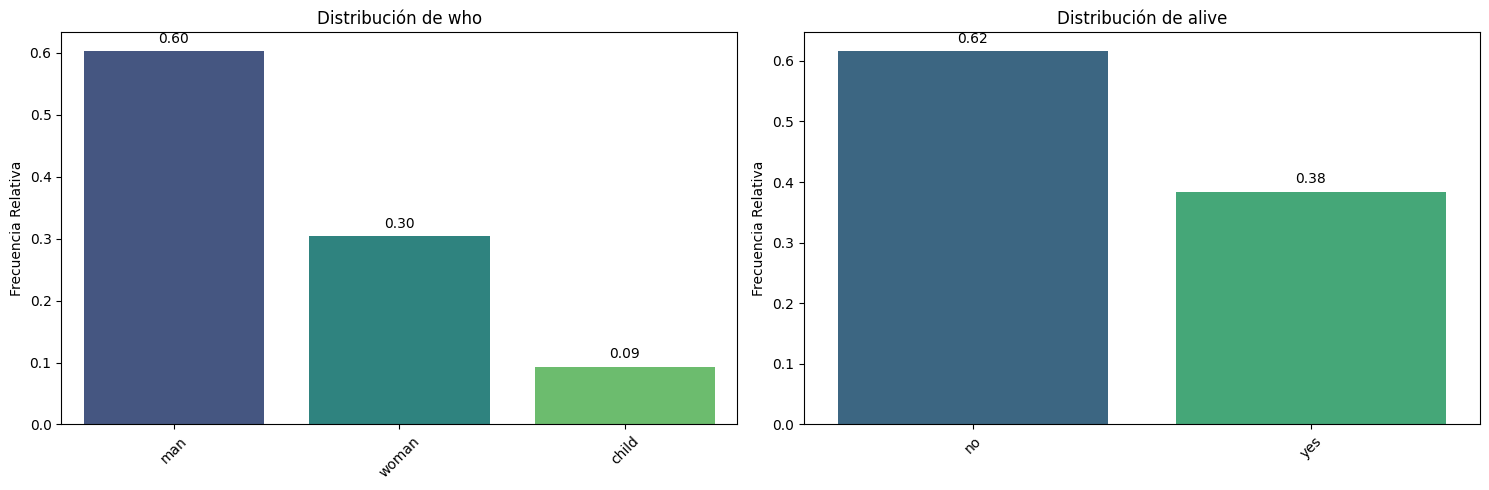

In [103]:
# muestro la frencuencia de las dos variables para tener una perspectiva
pinta_distribucion_categoricas(df_titanic, ["who","alive"],relativa=True, mostrar_valores=True)

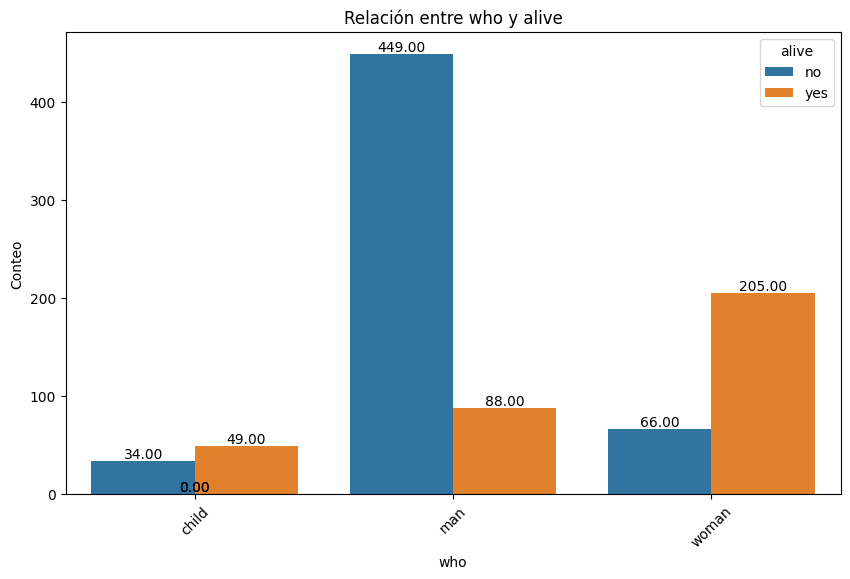

In [126]:
plot_categorical_relationship_fin(df_titanic,'who','alive', show_values=True)

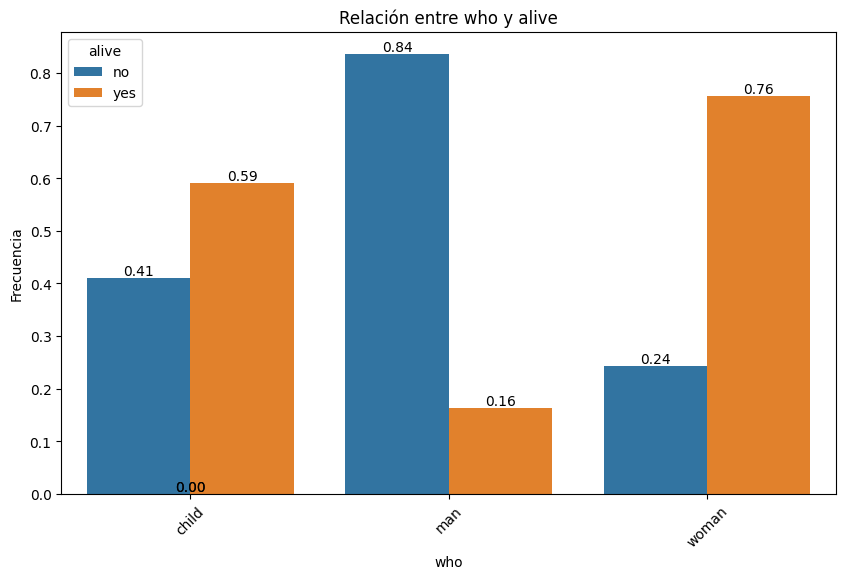

In [ ]:
plot_categorical_relationship_fin(df_titanic,'who','alive', relative_freq=True, show_values=True)

# si eres mujer tienes un 76% de haber sobrevivido
# aqui ya se intuye que hay diferencia entre sexos para sobrevivir

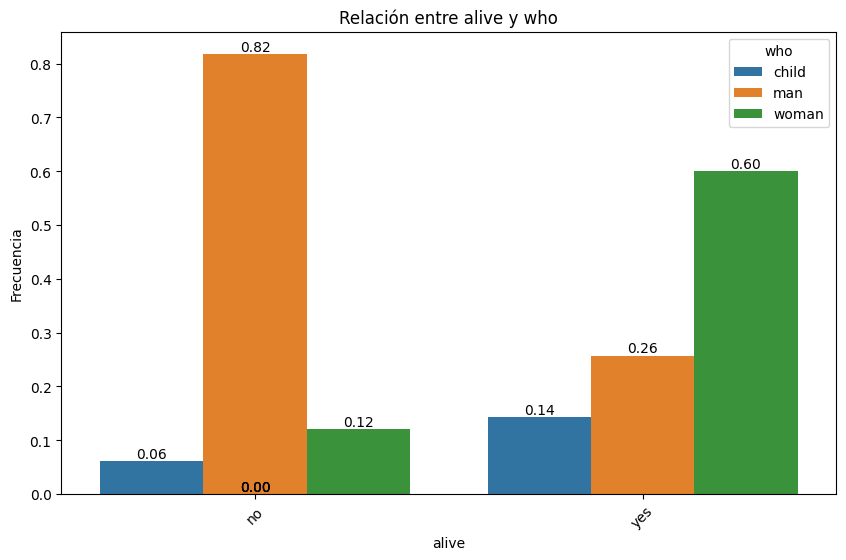

In [ ]:
# Terminos relativos
plot_categorical_relationship_fin(df_titanic, "alive", "who", relative_freq=True, show_values=True)

# ESTE NO SERIA EL CONCEPTO RELATIVO, pq está sacando el % de los absoluto
# Es decir, El 60% de los supervivientes fueron mujeres

In [136]:
# viendo las frecuencias y el analisis bivariante,
# parece si que hay dependencia

# Hago un Test de chi para corroborarlo
# 1 tabla contingencia
tabla_contingencia = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
sex,,
female,81,233
male,468,109


In [132]:
# 2 prueba
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [ ]:
# 3 P-value

# Como  P-Value <<< 0.05 -> Rechazamos la hipotesis de la independencia variables
# Lo que se intuia, hay una relacion estadistica entre el sexo y la supervivencia

In [145]:
# Para el caso solo de ser ADULTO (hombre o mujer) y NIÑO

adulto_child= []
for valor in df_titanic["who"]:
    if valor=="child":
        adulto_child.append("child")
    else:
        adulto_child.append("adult")
df_titanic["adulto_infante"]= adulto_child

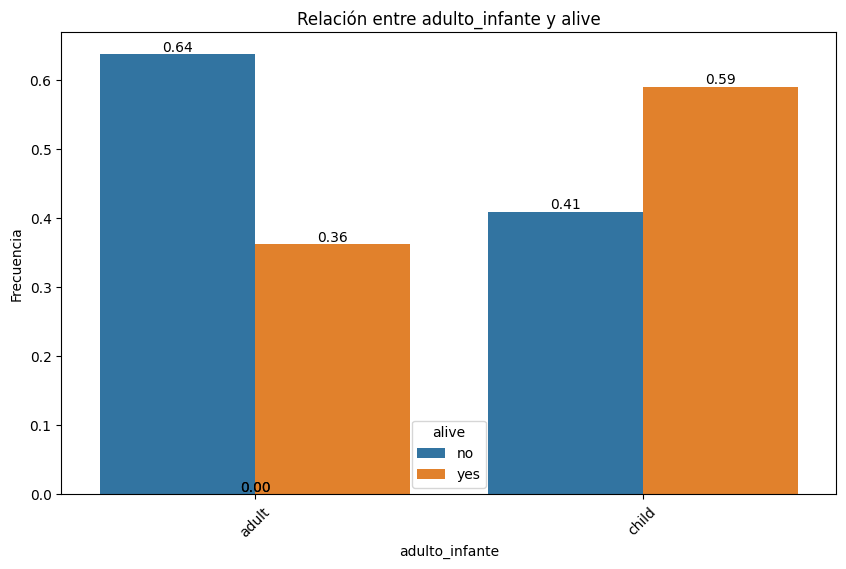

In [ ]:
plot_categorical_relationship_fin(df_titanic,'adulto_infante','alive', relative_freq=True, show_values=True)

In [118]:
df_titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [137]:
# 1 tabla congigencia WHO y ALIVE
tabla_contingencia2 = pd.crosstab(df_titanic['who'], df_titanic['alive'])
tabla_contingencia2

# 2 prueba
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


In [ ]:
# 3 P-value

# Como  P-Value <<< 0.05 -> Rechazamos la hipotesis de la independencia variables
# Lo que se intuia, hay una relacion estadistica entre el sexo y la supervivencia

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

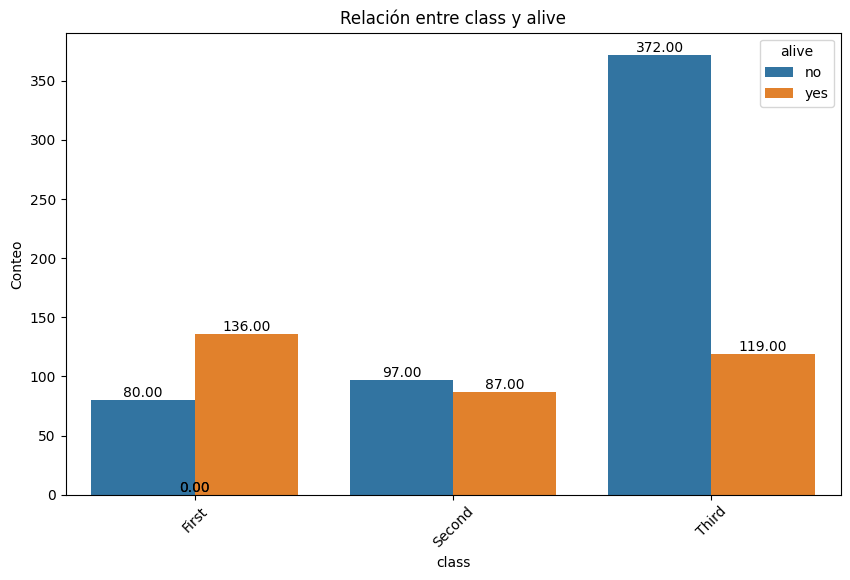

In [ ]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True)

# En terminos absolutos sobrevivieron mas los de primera clase 136k

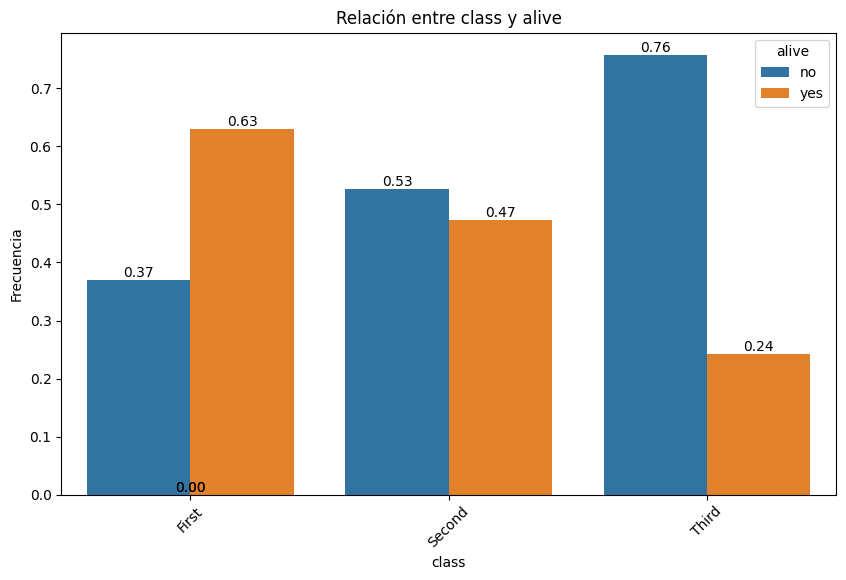

In [ ]:
plot_categorical_relationship_fin(df_titanic, "class", "alive",relative_freq=True, show_values=True)

# En terminos absolutos, si eres de primera clase, tienes un 63% de sobrevivir

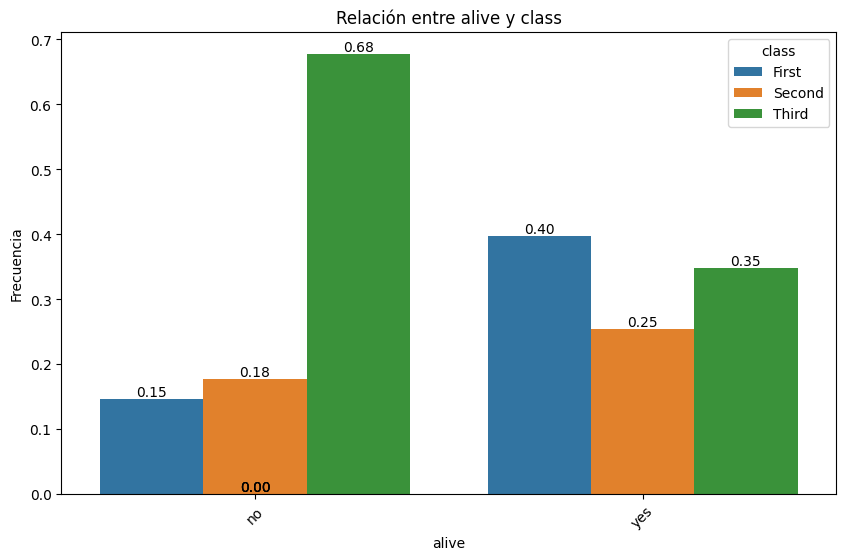

In [ ]:
plot_categorical_relationship_fin(df_titanic, "alive", "class",relative_freq=True, show_values=True)
# Equivale a un 40% de los supervivientes

In [147]:
# 1 tabla congigencia CLASS y ALIVE
tabla_contingencia3 = pd.crosstab(df_titanic['class'], df_titanic['alive'])
tabla_contingencia3

# 2 prueba
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia3)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
# 3 P-value

# Como  P-Value <<< 0.05 -> Rechazamos la hipotesis de la independencia variables
# Lo que se intuia, hay una relacion estadistica entre la clase y la supervivencia

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [167]:
df_titanic.groupby(["alive", "embark_town"])["alive"].count()

alive  embark_town
no     Cherbourg       75
       Queenstown      47
       Southampton    427
yes    Cherbourg       93
       Queenstown      30
       Southampton    217
Name: alive, dtype: int64

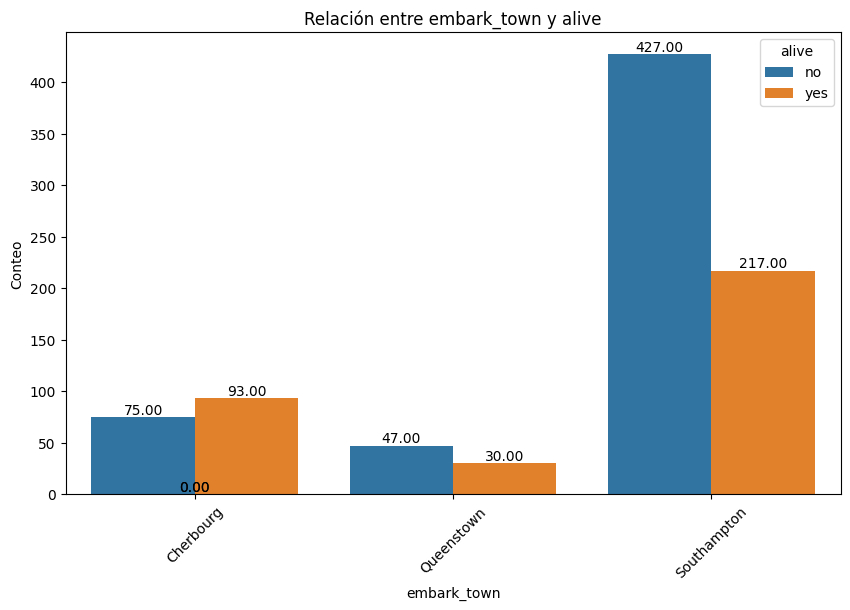

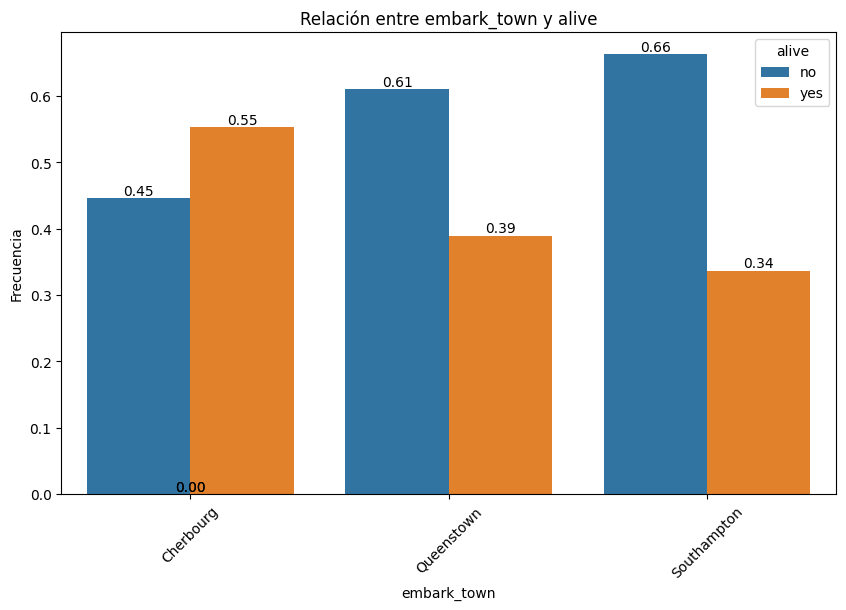

In [ ]:
#Absoluto
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values=True )
# De Southampton los que mas murieron

# Relativo
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq=True, show_values=True )
# porcentualmente tambien Southampton, pero practicamente iguala Queenstown

In [170]:
# 1 tabla congigencia EMBARK_TOWN y ALIVE
tabla_contingencia4 = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
tabla_contingencia4

# 2 prueba
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia3)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
# 3 P-value

# Como  P-Value <<< 0.05 -> Rechazamos la hipotesis de la independencia variables
# Hay una relacion estadistica entre donde se embarcó y la supervivencia

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

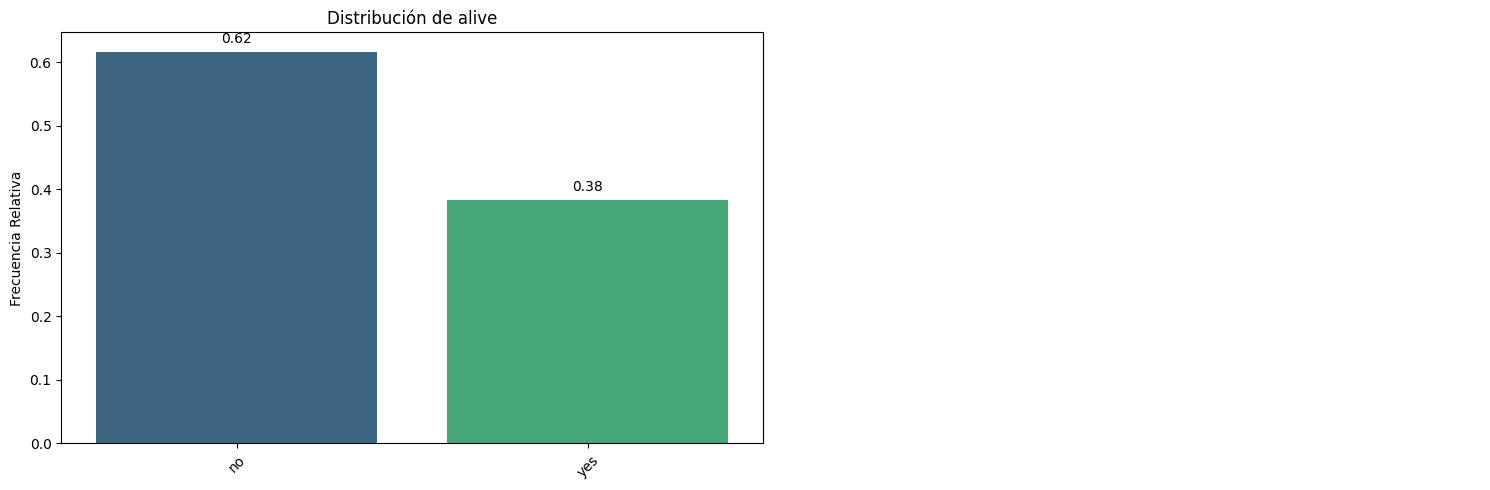

(2,)


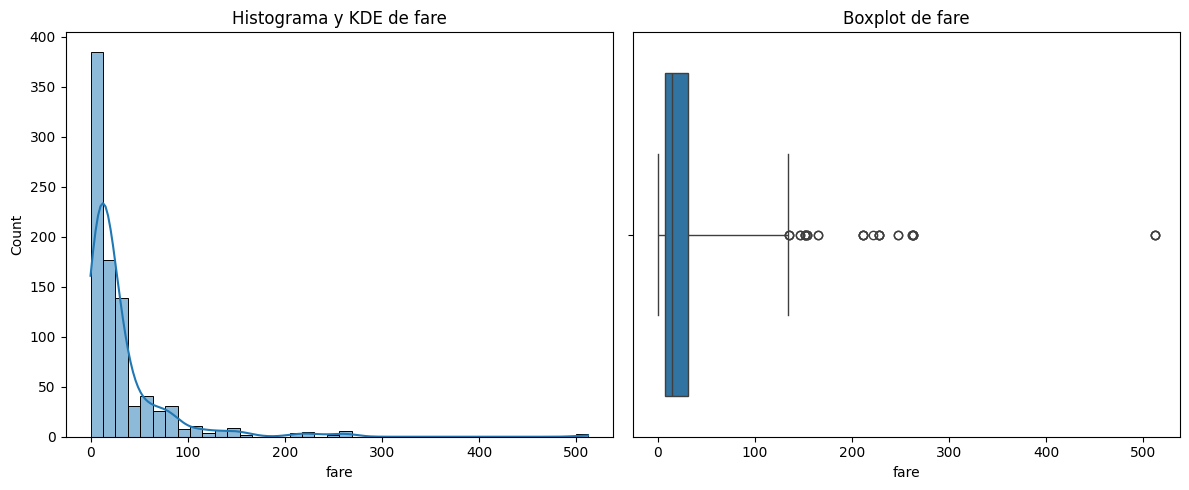

In [ ]:
#1 FRENCUENCIAS
pinta_distribucion_categoricas(df_titanic, ["alive"], relativa=True, mostrar_valores=True)
plot_combined_graphs(df_titanic, ["fare"], bins=40, whisker_width=4.5)

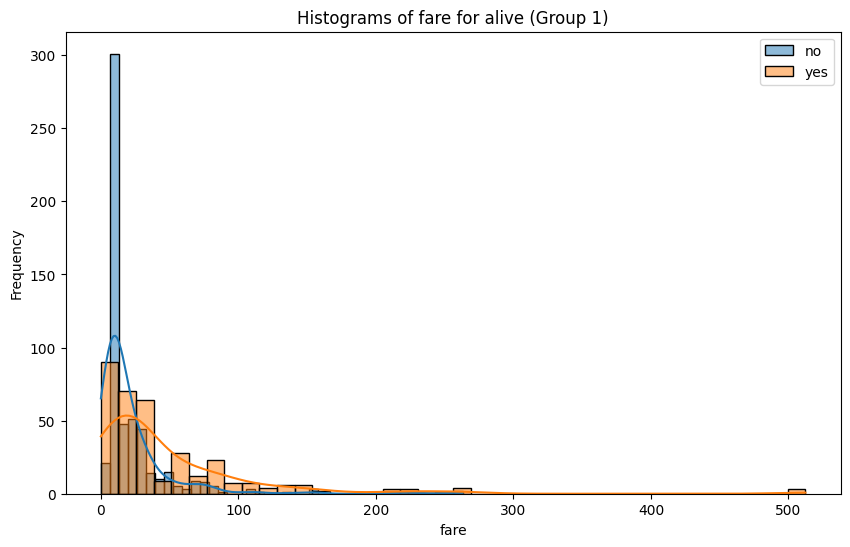

In [ ]:
# Histogramas
plot_grouped_histograms(df_titanic,"alive", "fare", 2, bins=40)

In [195]:
# PRUEBA DE U DE MANN-WHITNEY pq
# Categorica es binaria
# Numerica NO campana de gauss

#1 importar libreria
from scipy.stats import mannwhitneyu

#2 separar en grupos
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

#3 aplicar la prueba
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [ ]:
# 3 P-value

# Como  P-Value <<< 0.05 -> Rechazamos la hipotesis de la independencia variables
# Hay una relacion estadistica entre el precio billete y la supervivencia

5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [220]:
print("no pagaron un total de ", (df_titanic["fare"]==0).sum(), "pasajeros")
# 15 personas no pagaron

df_titanic[df_titanic["fare"]==0].sort_values(by="class")
# Ninguno era un niño, todos eran hombres, que viajaban solos y embarcaron en el mismo puerto
# Se reaprtieron en distintas clases
# Por lo que posiblemente sean miembros de la tripulación


no pagaron un total de  15 pasajeros


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adulto_infante
263,male,40.00,0.0,First,man,True,Southampton,no,True,0,adult
633,male,33.17,0.0,First,man,True,Southampton,no,True,0,adult
806,male,39.00,0.0,First,man,True,Southampton,no,True,0,adult
815,male,33.17,0.0,First,man,True,Southampton,no,True,0,adult
822,male,38.00,0.0,First,man,True,Southampton,no,True,0,adult
277,male,33.17,0.0,Second,man,True,Southampton,no,True,0,adult
413,male,33.17,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,33.17,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,33.17,0.0,Second,man,True,Southampton,no,True,0,adult
674,male,33.17,0.0,Second,man,True,Southampton,no,True,0,adult


In [225]:
print("¿cuántas personas hubo que pagaron el billete mas caro?", df_titanic[["fare"]].max().count(), "\n")

print("¿cuanto págo?¿sobrevivió?")
df_titanic[["fare", "alive"]].max()

¿cuántas personas hubo que pagaron el billete mas caro? 1 

¿cuanto págo?¿sobrevivió?


fare     512.3292
alive         yes
dtype: object

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [232]:
df_titanic.groupby(["embark_town", "alive"])["fare"].mean()

embark_town  alive
Cherbourg    no       35.443335
             yes      79.720926
Queenstown   no       13.335904
             yes      13.182227
Southampton  no       20.743987
             yes      39.547081
Name: fare, dtype: float64

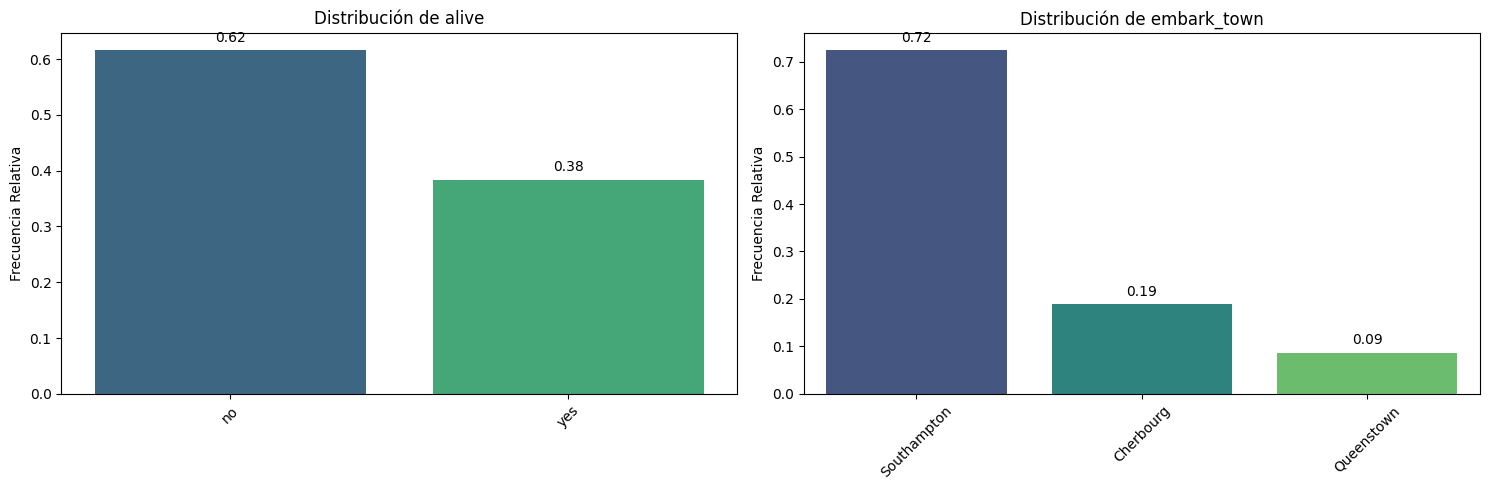

(2,)


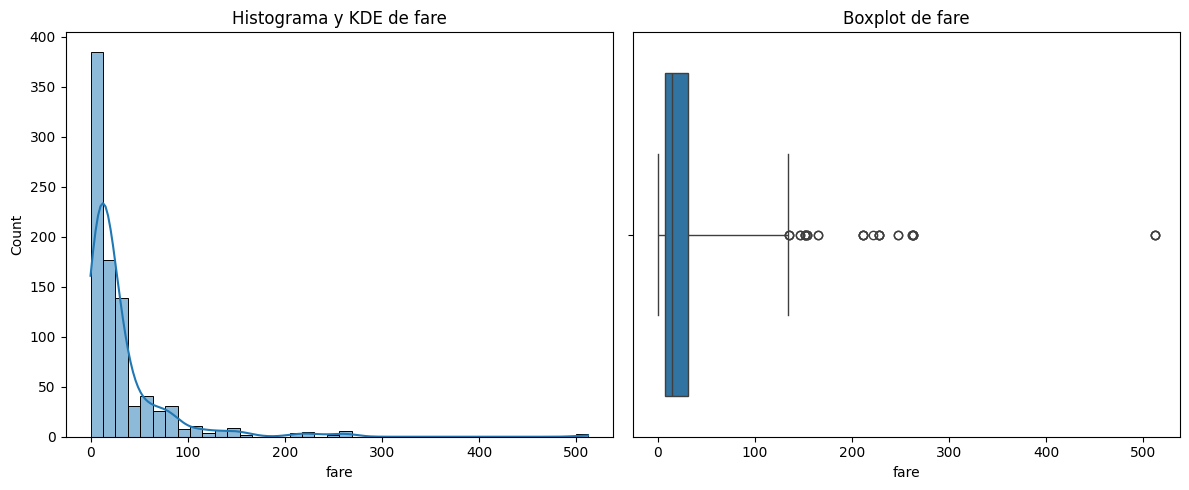

In [ ]:
# frecuencias, distribuciones univariables
pinta_distribucion_categoricas(df_titanic, ["alive", "embark_town"], relativa=True, mostrar_valores=True)
plot_combined_graphs(df_titanic, ["fare"], whisker_width=4.5, bins=40)

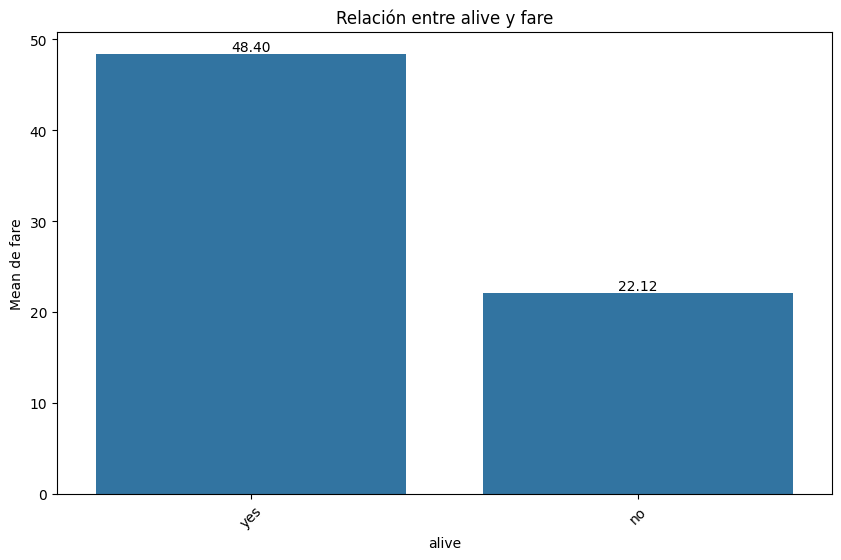

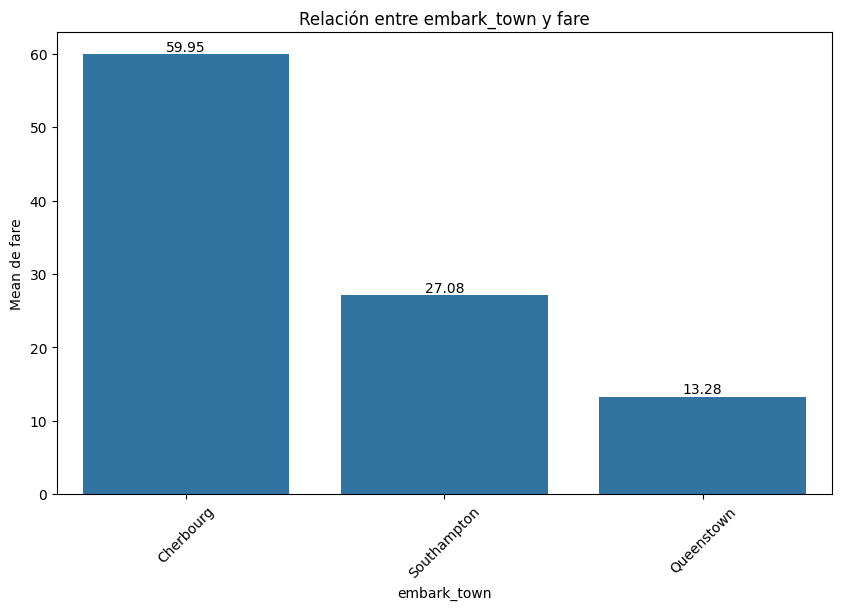

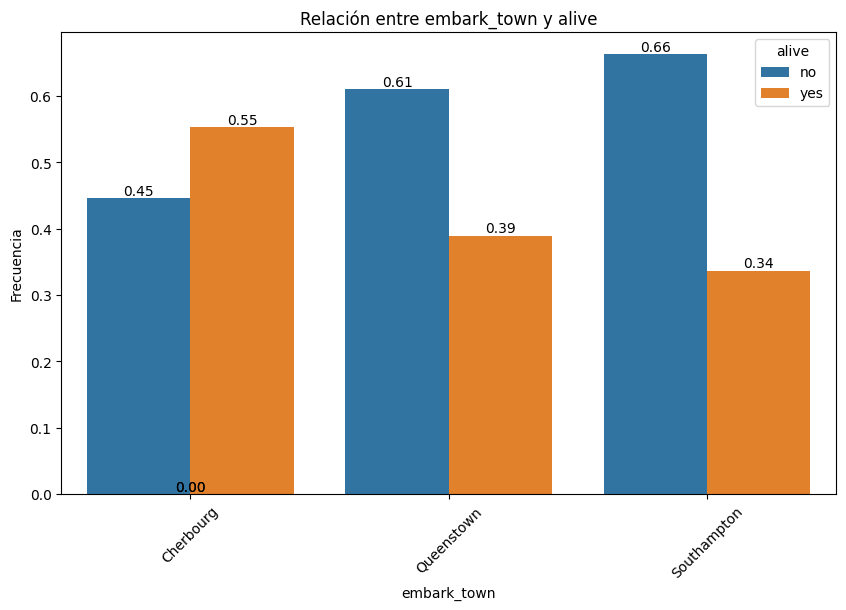

In [ ]:
# analis bivariantes de las tres variables

plot_categorical_numerical_relationship(df_titanic,"alive","fare",  show_values=True)
plot_categorical_numerical_relationship(df_titanic,"embark_town","fare",  show_values=True)
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=True, show_values=True)

In [ ]:
# Mayor tarifa, mejor supervivencia
# From Cherbourg, pagaron mas de media
# Si saliste from Cherbourg, tienes mas posibilidades de supervivencia

In [254]:
columnas = ["alive","fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


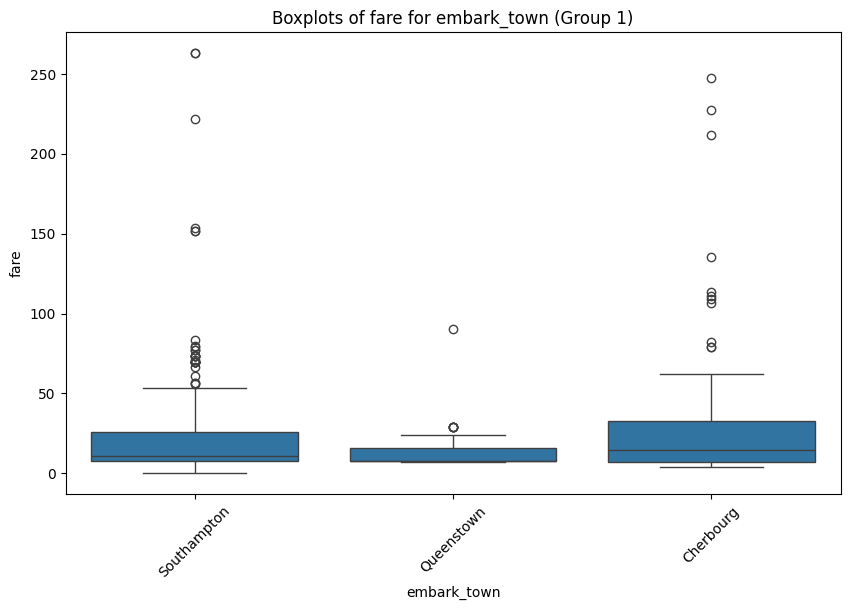

Respuesta yes:


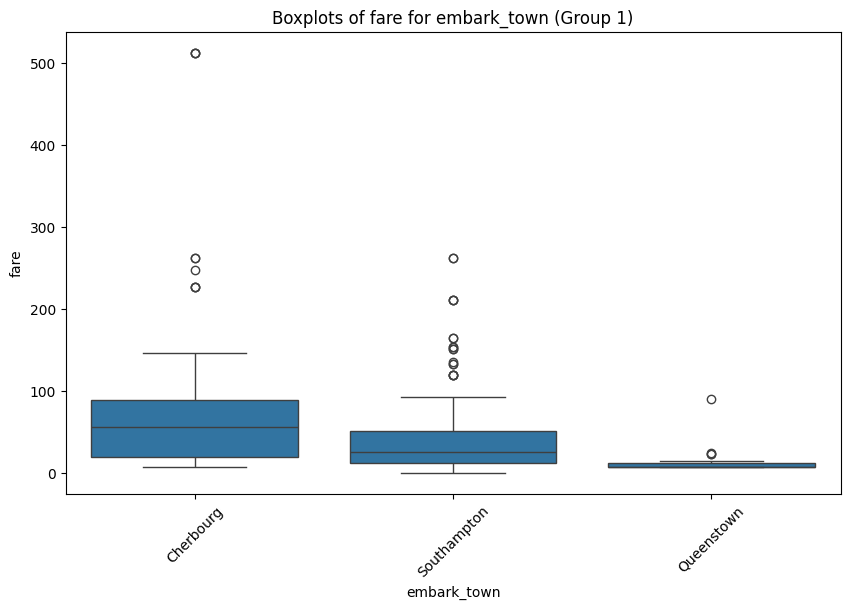

In [256]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_boxplots(df_datos,col_2,col_1)

In [ ]:
# en Cherbourg, han pagado de media mas que en Southampont
# y muchas mas que en Queenstown
# aquellos que se salvaron

Supervivencia no:


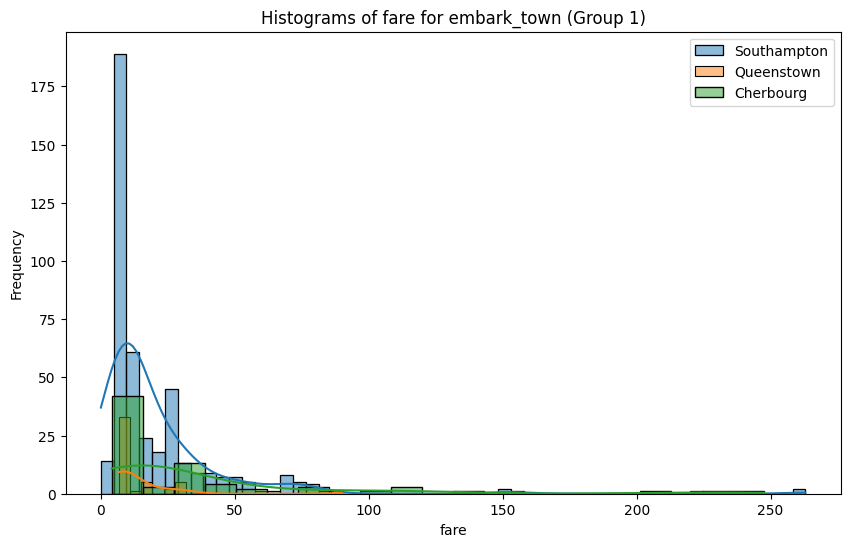

Supervivencia yes:


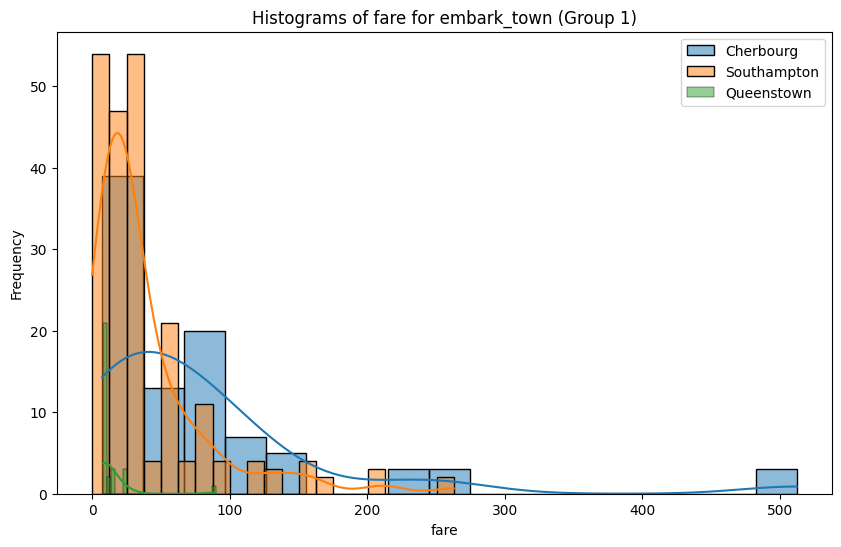

In [261]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Supervivencia {valor}:")
    plot_grouped_histograms(df_datos,col_2,col_1, 5)

In [ ]:
# de aquellos que se salvaron
# Pese a que Southhampton han pagado muchos (son de donde mas habia), -
# La media de lo que pagaron es muy baja

# A pesar de tener una frecuencia menor,
# En Cherbough, han pagado mas caros los billetes de media

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [ ]:
# REVIEW

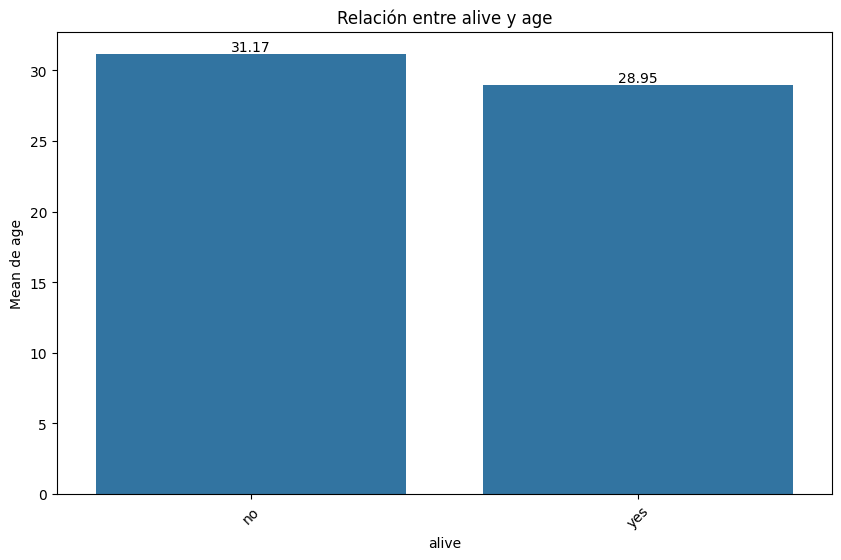

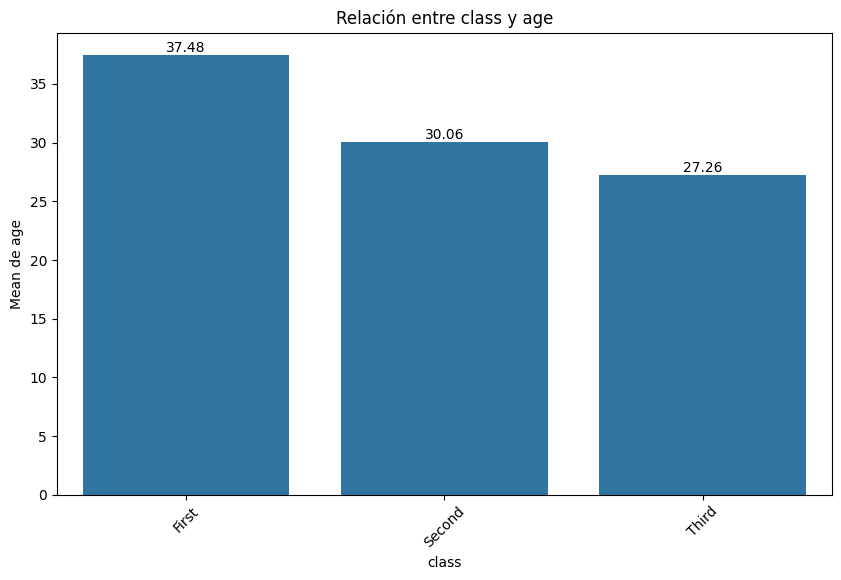

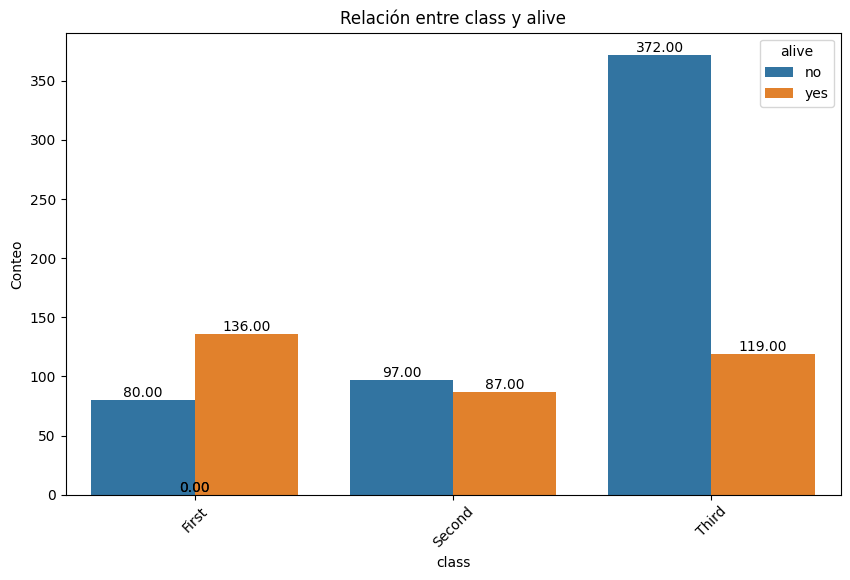

In [263]:
# analis bivariantes de las tres variables

plot_categorical_numerical_relationship(df_titanic,"alive","age",  show_values=True)
plot_categorical_numerical_relationship(df_titanic,"class","age",  show_values=True)
plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq=False, show_values=True)

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [268]:
df_titanic[["fare", "age"]].describe()

,fare,age
count,891.000000,891.000000
mean,32.204208,30.319024
std,49.693429,13.063744
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,32.000000
75%,31.000000,35.000000
max,512.329200,80.000000


In [267]:
df_titanic[["fare", "age"]].median()

fare    14.4542
age     32.0000
dtype: float64

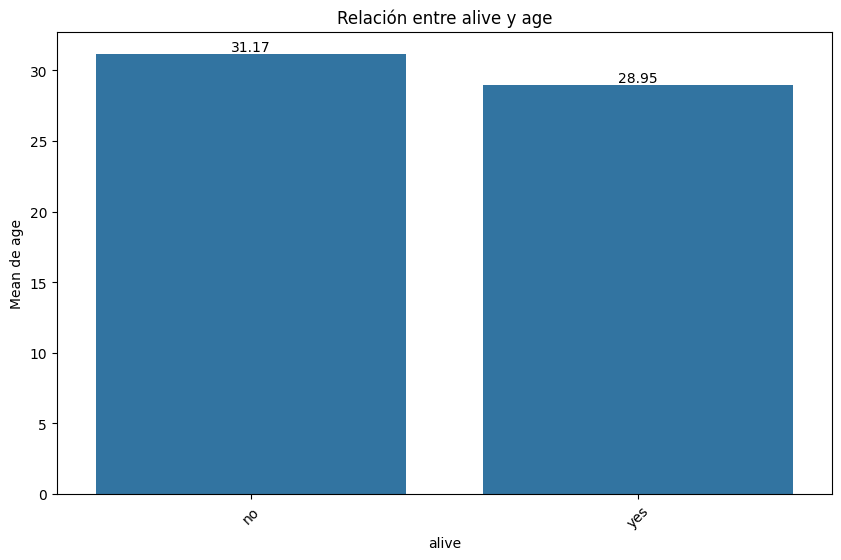

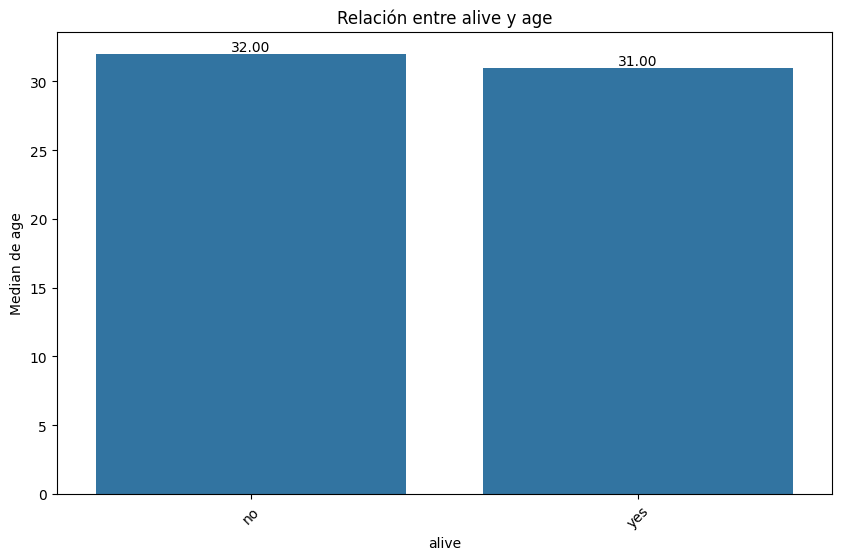

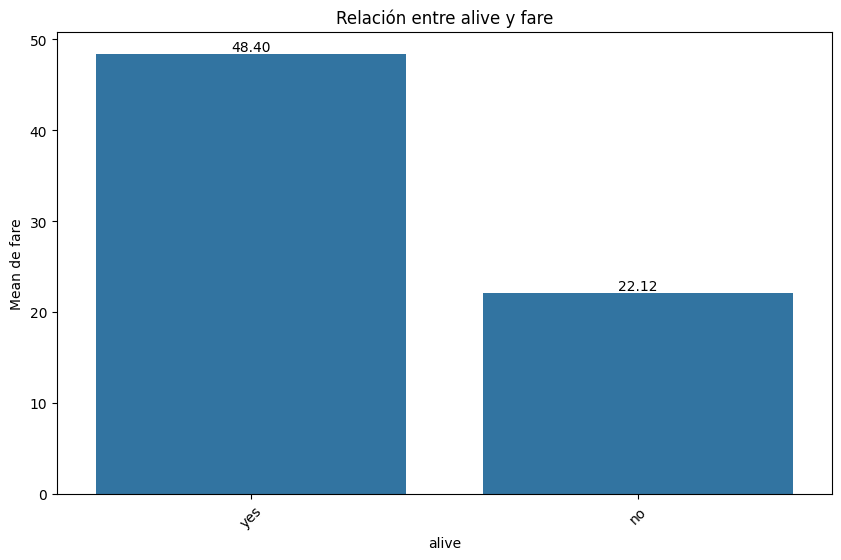

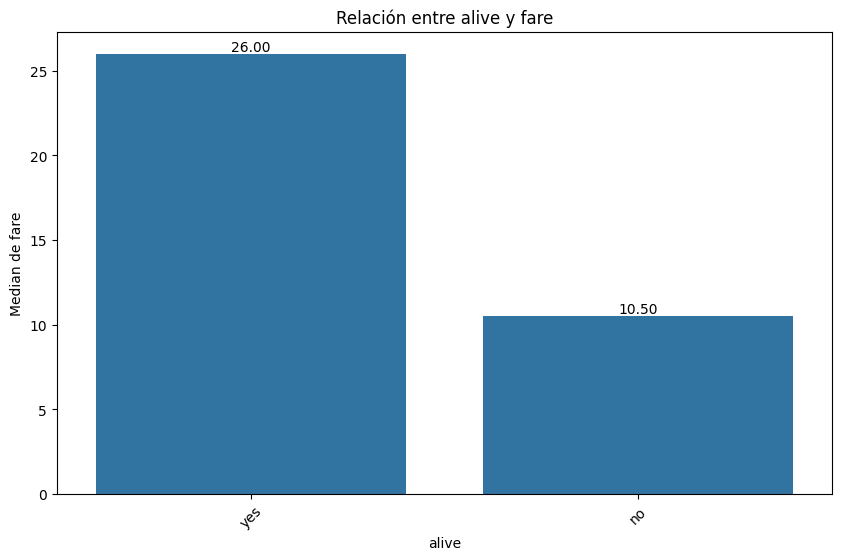

In [269]:
# Relación entre Edad y Supervivencia/Fallecimiento
plot_categorical_numerical_relationship(df_titanic, 'alive', 'age', show_values=True, measure='mean')
plot_categorical_numerical_relationship(df_titanic, 'alive', 'age', show_values=True, measure='median')

# Relación entre Fare y Supervivencia/Fallecimiento
plot_categorical_numerical_relationship(df_titanic, 'alive', 'fare', show_values=True, measure='mean')
plot_categorical_numerical_relationship(df_titanic, 'alive', 'fare', show_values=True, measure='median')

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.